In [203]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys             
from sympy import *                                # Module to see files and folders in directories
from scipy import stats
from scipy.stats import binom
from scipy.special import binom as binomcoef
from scipy.special import expit
import pandas as pd
import os
from importlib import reload

from pprint import pprint
import urllib.request
from html_table_parser.parser import HTMLTableParser

plt.style.use("./KD_style.mplstyle")

In [204]:

# # binary contents (HTTP Response Body)
# def url_get_contents(url):
 
#     # Opens a website and read its
#     # binary contents (HTTP Response Body)
 
#     #making request to the website
#     req = urllib.request.Request(url=url, headers={'User-Agent': 'Mozilla/5.0'})
#     f = urllib.request.urlopen(req)
 
#     #reading contents of the website
#     return f.read()
 
# # defining the html contents of a URL.
# xhtml = url_get_contents('https://kenpom.com/index.php?y=2014').decode('utf-8')
# # pprint(xhtml)
# # Defining the HTMLTableParser object
# p = HTMLTableParser()
 
# # feeding the html contents in the
# # HTMLTableParser object
# p.feed(xhtml)
# # print(np.array(p.tables[0]))
# # first_
# # Now finally obtaining the data of
# # the table required
# # pd.to_csv
 
# # converting the parsed data to
# # dataframe
# data1 = p.tables[0][1:]

# dataframe1 = pd.DataFrame(data1)
# databoolean = [dataframe1[0][i][:].isdigit() for i in dataframe1.index]
# keepbool = [True, True, True, True, True, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False]
# cleandata = np.array([row for idx, row in enumerate(data1) if databoolean[idx] == True])
# # print(cleandata[:,keepbool].shape)
# names = data1[0]
# names[-1] = "NCSOS AdjEM"
# names[-4] = "Strength AdjEM"
# print(names)
# data_2014 = pd.DataFrame(cleandata[:,keepbool], columns= names)


# # Saved 09/02/2023
# data_2014.to_csv("College_Basketball_Ratings_2014.csv", index=False)

In [205]:
data_2014 = pd.read_csv("./College_Basketball_Ratings_2014.csv")
display(data_2014)

,Rk,Team,Conf,W - L,AdjEM,AdjO,AdjD,AdjT,Luck,Strength AdjEM,OppO,OppD,NCSOS AdjEM
0,1,Louisville 4,Amer,31-6,30.41,118.9,88.5,67.2,-0.045,4.31,107.0,102.7,-4.65
1,2,Arizona 1,P12,33-5,30.11,116.5,86.4,62.8,0.014,9.30,109.9,100.6,1.62
2,3,Florida 1,SEC,36-3,28.57,116.5,88.0,61.3,0.053,9.02,109.4,100.4,2.39
3,4,Virginia 1,ACC,30-7,26.46,114.8,88.3,59.5,0.012,8.67,109.4,100.8,1.57
4,5,Wisconsin 2,B10,30-8,25.89,122.0,96.1,62.4,0.019,11.44,110.2,98.8,3.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,347,Mississippi Valley St.,SWAC,9-23,-22.93,93.0,115.9,70.9,0.012,-8.65,98.8,107.4,6.21
347,348,Abilene Christian,Slnd,11-20,-23.35,94.0,117.3,63.2,-0.045,-2.67,104.7,107.4,13.38
348,349,Presbyterian,BSth,6-26,-25.87,94.2,120.0,63.5,-0.017,-7.84,101.7,109.6,-7.05
349,350,Grambling St.,SWAC,5-24,-26.60,95.5,122.1,66.0,-0.017,-9.05,98.7,107.8,6.51


(65, 13)


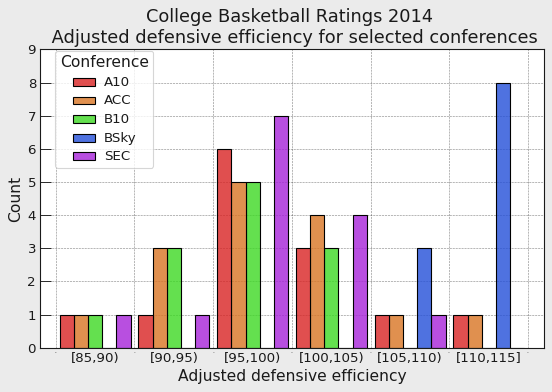

In [206]:
conf_interest = ["ACC", "SEC", "B10", "BSky", "A10"]
conf_mask_2014 = [conf in conf_interest for conf in data_2014["Conf"]]
data_2014_confselect = data_2014.iloc[conf_mask_2014].sort_values(by = "Conf")
print(data_2014_confselect.shape)
# sns.set_palette(sns.color_palette(plt.get_cmap))
fig, ax = plt.subplots()
# print(plt.prop_cycle())

binwidth = 5
datarange = [np.min(data_2014_confselect["AdjD"].to_numpy(dtype=np.float64)), np.max(data_2014_confselect["AdjD"].to_numpy(dtype=np.float64))]
binrange = [int(datarange[0] - datarange[0]%binwidth), int(datarange[1] + (binwidth - datarange[1]%binwidth))]

plot1 = sns.histplot(x = "AdjD", data = data_2014_confselect, hue = "Conf", binwidth=binwidth, binrange=binrange, multiple = "dodge", ax = ax,  shrink = 0.9, alpha = 0.8, legend = True)

ticks_pos = [edge + binwidth/2 for edge in range(*binrange, binwidth)]
ticks_name = [f"[{edge:.0f},{edge+binwidth:.0f})" for edge in range(*binrange, binwidth)]
ticks_name[-1] = ticks_name[-1].replace(")", "]")
ax.set_xticks(ticks_pos, minor = True)
ax.set_xticklabels(ticks_name, minor = True)
ax.tick_params(axis = "both", which = "minor", length = 0)
ax.tick_params(axis = "x", which = "major", labelsize = 0, length = 0)

ax.set(xlabel = "Adjusted defensive efficiency", title = "College Basketball Ratings 2014 \n Adjusted defensive efficiency for selected conferences", xlim = (84, 116), ylim = (0, 9))
# ax.grid(False, axis = "x")
# ax.xaxis.set_tick_params(width = 55, color = "k", size = 1.5)
# ax.xaxis.set_ticks_position("bottum")

ax.legend_.set_title("Conference")
plt.setp(ax.get_legend().get_title(), fontsize='14')
plt.setp(ax.get_legend().get_texts(), fontsize='12')
# plt.setp(ax.get_legend().set_bbox_to_anchor(), (0,0,0,0))
ax.get_legend().set_bbox_to_anchor((0.236,1.014,0,0))
ax.get_legend().set_alpha(1)
# ax.get_legend().set_frame_on(False)
ax.set_axisbelow(True)
ax.set_xlim(84, 116)
fig.tight_layout()
plt.savefig("AdjD_plot.png", facecolor = "white")
# ax.legend_.set_title_fontsize(12)
# plt.legend(labels = plot1.legend_.texts, title = "Conference", title_fontsize = 10)

PearsonRResult(statistic=0.8497242400709142, pvalue=3.585943830291705e-19)


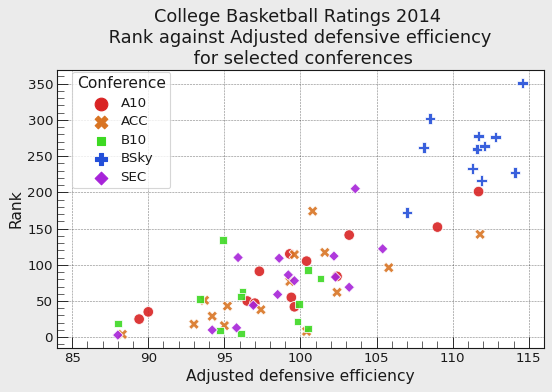

In [207]:
#Extra exercise 1
print(stats.pearsonr(data_2014_confselect['AdjD'].to_numpy(), data_2014_confselect['Rk'].to_numpy()))


fig, ax = plt.subplots()
sns.scatterplot(data = data_2014_confselect, x = "AdjD", y = "Rk", hue = "Conf", style = "Conf", s = 90, ax = ax, alpha = 0.9)
ax.set(ylabel = "Rank", xlabel= "Adjusted defensive efficiency", title = "College Basketball Ratings 2014 \n Rank against Adjusted defensive efficiency \n for selected conferences")
leg = ax.legend()
ax.legend_.set_title("Conference")
plt.setp(ax.get_legend().get_title(), fontsize='14')
plt.setp(ax.get_legend().get_texts(), fontsize='12')
# print(ax.get_legend_handles_labels())
for idx, _ in enumerate(ax.get_legend_handles_labels()[0]):
    leg.legendHandles[idx]._sizes = [130]

ax.get_legend().set_bbox_to_anchor((0.244,1.015,0,0))
ax.set_axisbelow(True)
ax.set_xlim(84, 116)
fig.tight_layout()

plt.savefig("AdjD_rank_plot.png", facecolor = "white")

In [208]:

# # binary contents (HTTP Response Body)
# def url_get_contents(url):
 
#     # Opens a website and read its
#     # binary contents (HTTP Response Body)
 
#     #making request to the website
#     req = urllib.request.Request(url=url, headers={'User-Agent': 'Mozilla/5.0'})
#     f = urllib.request.urlopen(req)
 
#     #reading contents of the website
#     return f.read()
 
# # defining the html contents of a URL.
# xhtml = url_get_contents('https://kenpom.com/index.php?y=2009').decode('utf-8')
# # pprint(xhtml)
# # Defining the HTMLTableParser object
# p = HTMLTableParser()
 
# # feeding the html contents in the
# # HTMLTableParser object
# p.feed(xhtml)
# # print(np.array(p.tables[0]))
# # first_
# # Now finally obtaining the data of
# # the table required
# # pd.to_csv
 
# # converting the parsed data to
# # dataframe
# data1 = p.tables[0][1:]

# dataframe1 = pd.DataFrame(data1)
# databoolean = [dataframe1[0][i][:].isdigit() for i in dataframe1.index]
# keepbool = [True, True, True, True, True, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False]
# cleandata = np.array([row for idx, row in enumerate(data1) if databoolean[idx] == True])
# # print(cleandata[:,keepbool].shape)
# names = data1[0]
# names[-1] = "NCSOS AdjEM"
# names[-4] = "Strength AdjEM"
# print(names)
# data_2009 = pd.DataFrame(cleandata[:,keepbool], columns= names)
# display(data_2009)

# # Saved 10/02/2023
# data_2009.to_csv("College_Basketball_Ratings_2009.csv", index=False)

In [209]:
data_2009 = pd.read_csv("./College_Basketball_Ratings_2009.csv")
display(data_2009)

,Rk,Team,Conf,W - L,AdjEM,AdjO,AdjD,AdjT,Luck,Strength AdjEM,OppO,OppD,NCSOS AdjEM
0,1,North Carolina 1,ACC,34-4,31.14,123.2,92.1,72.9,-0.011,9.91,108.2,98.3,1.06
1,2,Connecticut 1,BE,31-5,29.25,116.0,86.8,67.1,0.024,10.37,109.0,98.6,-1.68
2,3,Pittsburgh 1,BE,31-5,28.96,121.2,92.3,65.2,-0.012,10.11,108.1,98.0,0.79
3,4,Memphis 2,CUSA,33-4,28.67,112.8,84.2,65.9,-0.009,4.73,105.5,100.8,4.19
4,5,Louisville 1,BE,31-6,26.06,111.2,85.2,66.9,0.068,9.57,108.6,99.0,-0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,340,Alcorn St.,SWAC,6-25,-26.40,92.1,118.5,72.4,-0.050,-10.26,96.5,106.7,2.94
340,341,Grambling St.,SWAC,6-23,-27.10,89.8,116.9,61.8,-0.015,-10.00,96.6,106.6,4.77
341,342,Maryland Eastern Shore,MEAC,7-23,-27.77,89.2,116.9,63.5,0.060,-12.24,93.7,105.9,-9.51
342,343,North Carolina Central,ind,4-27,-28.86,85.6,114.5,69.0,-0.015,-4.55,100.0,104.5,5.90


In [210]:
def cleannames(dirtynames):
    names_without_numbers = [''.join(letter for letter in name if letter.isdigit() == False) for name in dirtynames]
    # ad hoc double operation to remove the two last spaces
    goodnames = [''.join(letter for idx, letter in enumerate(name) if not (idx == len(name)-1 and letter == " ")) for name in names_without_numbers]
    goodnames = [''.join(letter for idx, letter in enumerate(name) if not (idx == len(name)-1 and letter == " ")) for name in goodnames]
    return goodnames

data_2014["Team"] = cleannames(data_2014["Team"].to_numpy())
data_2009["Team"] = cleannames(data_2009["Team"].to_numpy())
display(data_2014, data_2009)

,Rk,Team,Conf,W - L,AdjEM,AdjO,AdjD,AdjT,Luck,Strength AdjEM,OppO,OppD,NCSOS AdjEM
0,1,Louisville,Amer,31-6,30.41,118.9,88.5,67.2,-0.045,4.31,107.0,102.7,-4.65
1,2,Arizona,P12,33-5,30.11,116.5,86.4,62.8,0.014,9.30,109.9,100.6,1.62
2,3,Florida,SEC,36-3,28.57,116.5,88.0,61.3,0.053,9.02,109.4,100.4,2.39
3,4,Virginia,ACC,30-7,26.46,114.8,88.3,59.5,0.012,8.67,109.4,100.8,1.57
4,5,Wisconsin,B10,30-8,25.89,122.0,96.1,62.4,0.019,11.44,110.2,98.8,3.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,347,Mississippi Valley St.,SWAC,9-23,-22.93,93.0,115.9,70.9,0.012,-8.65,98.8,107.4,6.21
347,348,Abilene Christian,Slnd,11-20,-23.35,94.0,117.3,63.2,-0.045,-2.67,104.7,107.4,13.38
348,349,Presbyterian,BSth,6-26,-25.87,94.2,120.0,63.5,-0.017,-7.84,101.7,109.6,-7.05
349,350,Grambling St.,SWAC,5-24,-26.60,95.5,122.1,66.0,-0.017,-9.05,98.7,107.8,6.51


,Rk,Team,Conf,W - L,AdjEM,AdjO,AdjD,AdjT,Luck,Strength AdjEM,OppO,OppD,NCSOS AdjEM
0,1,North Carolina,ACC,34-4,31.14,123.2,92.1,72.9,-0.011,9.91,108.2,98.3,1.06
1,2,Connecticut,BE,31-5,29.25,116.0,86.8,67.1,0.024,10.37,109.0,98.6,-1.68
2,3,Pittsburgh,BE,31-5,28.96,121.2,92.3,65.2,-0.012,10.11,108.1,98.0,0.79
3,4,Memphis,CUSA,33-4,28.67,112.8,84.2,65.9,-0.009,4.73,105.5,100.8,4.19
4,5,Louisville,BE,31-6,26.06,111.2,85.2,66.9,0.068,9.57,108.6,99.0,-0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,340,Alcorn St.,SWAC,6-25,-26.40,92.1,118.5,72.4,-0.050,-10.26,96.5,106.7,2.94
340,341,Grambling St.,SWAC,6-23,-27.10,89.8,116.9,61.8,-0.015,-10.00,96.6,106.6,4.77
341,342,Maryland Eastern Shore,MEAC,7-23,-27.77,89.2,116.9,63.5,0.060,-12.24,93.7,105.9,-9.51
342,343,North Carolina Central,ind,4-27,-28.86,85.6,114.5,69.0,-0.015,-4.55,100.0,104.5,5.90


In [211]:
conf_interest = ["ACC", "SEC", "B10", "BSky", "A10"]
conf_mask_2014 = [conf in conf_interest for conf in data_2014["Conf"]]
data_2014_confselect = data_2014.iloc[conf_mask_2014]

conf_mask_2009 = [conf in conf_interest for conf in data_2009["Conf"]]
data_2009_confselect = data_2009.iloc[conf_mask_2009]
# There are 7 more teams in the conferences in 2014
display(data_2014_confselect.shape, data_2009_confselect.shape)
mask_shared_teams_2009 = [team in data_2014_confselect["Team"].to_numpy() for team in data_2009_confselect["Team"]]
print(np.sum(mask_shared_teams_2009))
mask_shared_teams_2014 = [team in data_2009_confselect["Team"].to_numpy() for team in data_2014_confselect["Team"]]
print(np.sum(mask_shared_teams_2014))
# Only 55 teams played both in 2009 and 2014

data_2014_confselect_shared = data_2014_confselect.iloc[mask_shared_teams_2014].sort_values(by = ["Conf", "Team"])
data_2009_confselect_shared = data_2009_confselect.iloc[mask_shared_teams_2009].sort_values(by = ["Conf", "Team"])
# display(data_2009_confselect_shared, data_2014_confselect_shared)
# display(data_2014_confselect.iloc[~np.array(mask_shared_teams_2014)], data_2009_confselect.iloc[~np.array(mask_shared_teams_2009)])
print(np.sum(data_2014_confselect_shared["Conf"].to_numpy() == data_2009_confselect_shared["Conf"].to_numpy()))


(65, 13)

(58, 13)

55
55
55


PearsonRResult(statistic=-0.5796745482768323, pvalue=3.525260290456147e-06)


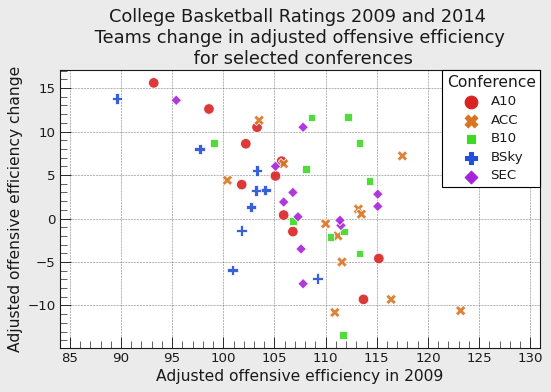

In [212]:
AdjO_diff = data_2014_confselect_shared["AdjO"].to_numpy() - data_2009_confselect_shared["AdjO"].to_numpy()
marker_list = []

print(stats.pearsonr(data_2009_confselect_shared["AdjO"], AdjO_diff))


fig, ax = plt.subplots()

# markers = {conf:"+" for conf in conf_interest}
# print(markers)
# sns.scatterplot(x = data_2009_confselect_shared["AdjO"], y = AdjO_diff, hue = data_2009_confselect_shared["Conf"], marker="+", s = 90, ax = ax, alpha = 0.9, )
# sns.scatterplot(x = data_2009_confselect_shared["AdjO"], y = AdjO_diff, hue = data_2009_confselect_shared["Conf"], marker="x", s = 90, ax = ax, alpha = 0.9, )
sns.scatterplot(x = data_2009_confselect_shared["AdjO"], y = AdjO_diff, hue = data_2009_confselect_shared["Conf"], style = data_2009_confselect_shared["Conf"], s = 90, ax = ax, alpha = 0.9)
ax.set(ylabel = "Adjusted offensive efficiency change", xlabel= "Adjusted offensive efficiency in 2009", title = "College Basketball Ratings 2009 and 2014 \n Teams change in adjusted offensive efficiency \n for selected conferences")
leg = ax.legend(fancybox = False, framealpha = 1, loc = 1, bbox_to_anchor = (1,1,0.011,0.02))
ax.legend_.set_title("Conference")
plt.setp(ax.get_legend().get_title(), fontsize='14')
plt.setp(ax.get_legend().get_texts(), fontsize='12')
leg.get_frame().set_edgecolor("k")
# print(ax.get_legend_handles_labels())
for idx, _ in enumerate(ax.get_legend_handles_labels()[0]):
    leg.legendHandles[idx]._sizes = [130]

ax.set_axisbelow(True)
ax.set_xlim(84, 131)
ax.set_xticks(np.arange(85,131,5))
ax.set_xticklabels(np.arange(85,131,5))
fig.tight_layout()

plt.savefig("AdjO_plot_exercise2.png", facecolor = "white")

# Show names 
# for x, y, name in zip(data_2009_confselect_shared["AdjO"].to_numpy(), AdjO_diff, data_2009_confselect_shared["Team"].to_numpy()):
#     ax.annotate(name, (x+0.2, y+0.3), fontsize = 8)

In [213]:
means = [np.mean(sorted(AdjO_diff[data_2014_confselect_shared["Conf"] == conf])) for conf in conf_interest]
medians = [np.median(sorted(AdjO_diff[data_2014_confselect_shared["Conf"] == conf])) for conf in conf_interest]
print(conf_interest)
print(means, medians)
sorted(zip(conf_interest, means, medians))
data3 = pd.DataFrame(np.array([means, medians]).T, columns = ["mean", "median"], index = conf_interest)
data3 = data3.sort_index()
print(data3.to_latex())



['ACC', 'SEC', 'B10', 'BSky', 'A10']
[-0.6250000000000036, 2.2833333333333337, 2.6727272727272746, 2.3222222222222246, 4.336363636363635] [-0.04999999999999716, 1.6499999999999986, 4.299999999999997, 3.200000000000003, 4.900000000000006]
\begin{tabular}{lrr}
\toprule
{} &      mean &  median \\
\midrule
A10  &  4.336364 &    4.90 \\
ACC  & -0.625000 &   -0.05 \\
B10  &  2.672727 &    4.30 \\
BSky &  2.322222 &    3.20 \\
SEC  &  2.283333 &    1.65 \\
\bottomrule
\end{tabular}



C:\Users\Philip\AppData\Local\Temp\ipykernel_16020\3809968191.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data3.to_latex())


In [236]:
conf_interest = ["ACC", "SEC", "B10", "BSky", "A10"]
conf_mask_2014 = [conf not in conf_interest for conf in data_2014["Conf"]]
data_2014_confselect = data_2014.iloc[conf_mask_2014]

conf_mask_2009 = [conf not in conf_interest for conf in data_2009["Conf"]]
data_2009_confselect = data_2009.iloc[conf_mask_2009]
# There are 1 more teams in the conferences in 2009
display(data_2014_confselect.shape, data_2009_confselect.shape)
mask_shared_teams_2009 = [team in data_2014_confselect["Team"].to_numpy() for team in data_2009_confselect["Team"]]
print(np.sum(mask_shared_teams_2009))
mask_shared_teams_2014 = [team in data_2009_confselect["Team"].to_numpy() for team in data_2014_confselect["Team"]]
print(np.sum(mask_shared_teams_2014))
# Only 66 teams played both in 2009 and 2014


# Cannot be sorted the same way as the others unfortunately
data_2014_confselect_shared = data_2014_confselect.iloc[mask_shared_teams_2014].sort_values(by = ["Team"])
data_2009_confselect_shared = data_2009_confselect.iloc[mask_shared_teams_2009].sort_values(by = ["Team"])

print(np.sum(data_2014_confselect_shared["Conf"].to_numpy() == data_2009_confselect_shared["Conf"].to_numpy()))
conf_mask = data_2014_confselect_shared["Conf"].to_numpy() == data_2009_confselect_shared["Conf"].to_numpy()
# When including the 6th conference there are 5 teams which played collage basketball in both 2009 and 2014 
# but switched conference. 

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     display(data_2014_confselect_shared, data_2009_confselect_shared)
data_2014_confselect_shared = data_2014_confselect_shared.iloc[conf_mask].sort_values(by = ["Conf", "Team"])
data_2009_confselect_shared = data_2009_confselect_shared.iloc[conf_mask].sort_values(by = ["Conf", "Team"])


AdjO_diff = data_2014_confselect_shared["AdjO"].to_numpy() - data_2009_confselect_shared["AdjO"].to_numpy()
print(np.mean(AdjO_diff), np.median(AdjO_diff))

(286, 13)

(286, 13)

275
275
209
2.8095693779904307 2.0


(75, 13)


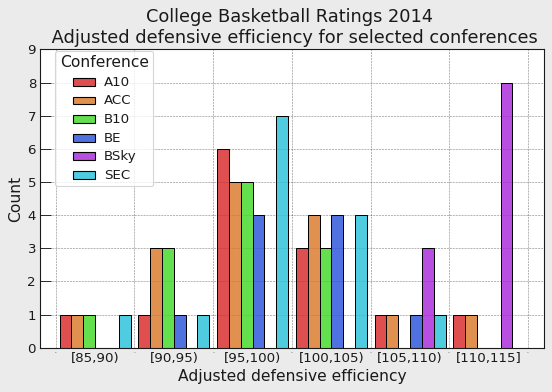

In [228]:
# Exercise 3
# copy down code

conf_interest = ["A10", "ACC", "B10", "BSky", "SEC", "BE"]
conf_mask_2014 = [conf in conf_interest for conf in data_2014["Conf"]]
data_2014_confselect = data_2014.iloc[conf_mask_2014].sort_values(by = "Conf")
# sns.set_palette(sns.color_palette(plt.get_cmap))
# print(plt.prop_cycle())
print(data_2014_confselect.shape)

fig, ax = plt.subplots()
# print(plt.prop_cycle())

binwidth = 5
datarange = [np.min(data_2014_confselect["AdjD"].to_numpy(dtype=np.float64)), np.max(data_2014_confselect["AdjD"].to_numpy(dtype=np.float64))]
binrange = [int(datarange[0] - datarange[0]%binwidth), int(datarange[1] + (binwidth - datarange[1]%binwidth))]

plot1 = sns.histplot(x = "AdjD", data = data_2014_confselect, hue = "Conf", binwidth=binwidth, binrange=binrange, multiple = "dodge", ax = ax,  shrink = 0.9, alpha = 0.8, legend = True)

ticks_pos = [edge + binwidth/2 for edge in range(*binrange, binwidth)]
ticks_name = [f"[{edge:.0f},{edge+binwidth:.0f})" for edge in range(*binrange, binwidth)]
ticks_name[-1] = ticks_name[-1].replace(")", "]")
ax.set_xticks(ticks_pos, minor = True)
ax.set_xticklabels(ticks_name, minor = True)
ax.tick_params(axis = "both", which = "minor", length = 0)
ax.tick_params(axis = "x", which = "major", labelsize = 0, length = 0)

ax.set(xlabel = "Adjusted defensive efficiency", title = "College Basketball Ratings 2014 \n Adjusted defensive efficiency for selected conferences", xlim = (84, 116), ylim = (0, 9))
# ax.grid(False, axis = "x")
# ax.xaxis.set_tick_params(width = 55, color = "k", size = 1.5)
# ax.xaxis.set_ticks_position("bottum")

ax.legend_.set_title("Conference")
plt.setp(ax.get_legend().get_title(), fontsize='14')
plt.setp(ax.get_legend().get_texts(), fontsize='12')
# plt.setp(ax.get_legend().set_bbox_to_anchor(), (0,0,0,0))
ax.get_legend().set_bbox_to_anchor((0.236,1.014,0,0))
ax.get_legend().set_alpha(1)
# ax.get_legend().set_frame_on(False)
ax.set_axisbelow(True)
ax.set_xlim(84, 116)
fig.tight_layout()
plt.savefig("AdjD_plot_exercise3.png", facecolor = "white")
# ax.legend_.set_title_fontsize(12)
# plt.legend(labels = plot1.legend_.texts, title = "Conference", title_fontsize = 10)

(75, 13)

(74, 13)

66
66
62


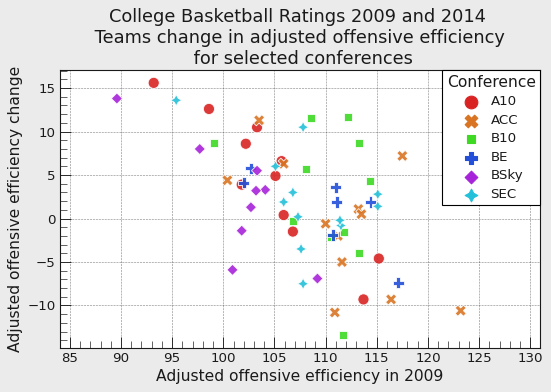

In [233]:
conf_interest = ["ACC", "SEC", "B10", "BSky", "A10", "BE"]
conf_mask_2014 = [conf in conf_interest for conf in data_2014["Conf"]]
data_2014_confselect = data_2014.iloc[conf_mask_2014]

conf_mask_2009 = [conf in conf_interest for conf in data_2009["Conf"]]
data_2009_confselect = data_2009.iloc[conf_mask_2009]
# There are 1 more teams in the conferences in 2009
display(data_2014_confselect.shape, data_2009_confselect.shape)
mask_shared_teams_2009 = [team in data_2014_confselect["Team"].to_numpy() for team in data_2009_confselect["Team"]]
print(np.sum(mask_shared_teams_2009))
mask_shared_teams_2014 = [team in data_2009_confselect["Team"].to_numpy() for team in data_2014_confselect["Team"]]
print(np.sum(mask_shared_teams_2014))
# Only 66 teams played both in 2009 and 2014


# Cannot be sorted the same way as the others unfortunately
data_2014_confselect_shared = data_2014_confselect.iloc[mask_shared_teams_2014].sort_values(by = ["Team"])
data_2009_confselect_shared = data_2009_confselect.iloc[mask_shared_teams_2009].sort_values(by = ["Team"])

print(np.sum(data_2014_confselect_shared["Conf"].to_numpy() == data_2009_confselect_shared["Conf"].to_numpy()))
conf_mask = data_2014_confselect_shared["Conf"].to_numpy() == data_2009_confselect_shared["Conf"].to_numpy()
# When including the 6th conference there are 5 teams which played collage basketball in both 2009 and 2014 
# but switched conference. 

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     display(data_2014_confselect_shared, data_2009_confselect_shared)
data_2014_confselect_shared = data_2014_confselect_shared.iloc[conf_mask].sort_values(by = ["Conf", "Team"])
data_2009_confselect_shared = data_2009_confselect_shared.iloc[conf_mask].sort_values(by = ["Conf", "Team"])


AdjO_diff = data_2014_confselect_shared["AdjO"].to_numpy() - data_2009_confselect_shared["AdjO"].to_numpy()
marker_list = []
fig, ax = plt.subplots()

# markers = {conf:"+" for conf in conf_interest}
# print(markers)
# sns.scatterplot(x = data_2009_confselect_shared["AdjO"], y = AdjO_diff, hue = data_2009_confselect_shared["Conf"], marker="+", s = 90, ax = ax, alpha = 0.9, )
# sns.scatterplot(x = data_2009_confselect_shared["AdjO"], y = AdjO_diff, hue = data_2009_confselect_shared["Conf"], marker="x", s = 90, ax = ax, alpha = 0.9, )
sns.scatterplot(x = data_2009_confselect_shared["AdjO"], y = AdjO_diff, hue = data_2009_confselect_shared["Conf"], style = data_2009_confselect_shared["Conf"], s = 100, ax = ax, alpha = 0.9)
ax.set(ylabel = "Adjusted offensive efficiency change", xlabel= "Adjusted offensive efficiency in 2009", title = "College Basketball Ratings 2009 and 2014 \n Teams change in adjusted offensive efficiency \n for selected conferences")
leg = ax.legend(fancybox = False, framealpha = 1, loc = 1, bbox_to_anchor = (1,1,0.011,0.02))
ax.legend_.set_title("Conference")
plt.setp(ax.get_legend().get_title(), fontsize='14')
plt.setp(ax.get_legend().get_texts(), fontsize='12')
leg.get_frame().set_edgecolor("k")
# print(ax.get_legend_handles_labels())
for idx, _ in enumerate(ax.get_legend_handles_labels()[0]):
    leg.legendHandles[idx]._sizes = [130]

ax.set_axisbelow(True)
ax.set_xlim(84, 131)
ax.set_xticks(np.arange(85,131,5))
ax.set_xticklabels(np.arange(85,131,5))
fig.tight_layout()

plt.savefig("AdjO_plot_exercise3.png", facecolor = "white")

In [234]:
means = [np.mean(sorted(AdjO_diff[data_2014_confselect_shared["Conf"] == conf])) for conf in conf_interest]
medians = [np.median(sorted(AdjO_diff[data_2014_confselect_shared["Conf"] == conf])) for conf in conf_interest]
print(conf_interest)
print(means, medians)
sorted(zip(conf_interest, means, medians))
data3 = pd.DataFrame(np.array([means, medians]).T, columns = ["mean", "median"], index = conf_interest)
data3 = data3.sort_index()
print(data3.to_latex())

['ACC', 'SEC', 'B10', 'BSky', 'A10', 'BE']
[-0.6250000000000036, 2.2833333333333337, 2.6727272727272746, 2.3222222222222246, 4.336363636363635, 1.1428571428571408] [-0.04999999999999716, 1.6499999999999986, 4.299999999999997, 3.200000000000003, 4.900000000000006, 1.9000000000000057]
\begin{tabular}{lrr}
\toprule
{} &      mean &  median \\
\midrule
A10  &  4.336364 &    4.90 \\
ACC  & -0.625000 &   -0.05 \\
B10  &  2.672727 &    4.30 \\
BE   &  1.142857 &    1.90 \\
BSky &  2.322222 &    3.20 \\
SEC  &  2.283333 &    1.65 \\
\bottomrule
\end{tabular}



C:\Users\Philip\AppData\Local\Temp\ipykernel_16020\94271482.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data3.to_latex())


In [237]:
conf_interest = ["ACC", "SEC", "B10", "BSky", "A10", "BE"]
conf_mask_2014 = [conf not in conf_interest for conf in data_2014["Conf"]]
data_2014_confselect = data_2014.iloc[conf_mask_2014]

conf_mask_2009 = [conf not in conf_interest for conf in data_2009["Conf"]]
data_2009_confselect = data_2009.iloc[conf_mask_2009]
# There are 1 more teams in the conferences in 2009
display(data_2014_confselect.shape, data_2009_confselect.shape)
mask_shared_teams_2009 = [team in data_2014_confselect["Team"].to_numpy() for team in data_2009_confselect["Team"]]
print(np.sum(mask_shared_teams_2009))
mask_shared_teams_2014 = [team in data_2009_confselect["Team"].to_numpy() for team in data_2014_confselect["Team"]]
print(np.sum(mask_shared_teams_2014))
# Only 66 teams played both in 2009 and 2014


# Cannot be sorted the same way as the others unfortunately
data_2014_confselect_shared = data_2014_confselect.iloc[mask_shared_teams_2014].sort_values(by = ["Team"])
data_2009_confselect_shared = data_2009_confselect.iloc[mask_shared_teams_2009].sort_values(by = ["Team"])

print(np.sum(data_2014_confselect_shared["Conf"].to_numpy() == data_2009_confselect_shared["Conf"].to_numpy()))
conf_mask = data_2014_confselect_shared["Conf"].to_numpy() == data_2009_confselect_shared["Conf"].to_numpy()
# When including the 6th conference there are 5 teams which played collage basketball in both 2009 and 2014 
# but switched conference. 

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     display(data_2014_confselect_shared, data_2009_confselect_shared)
data_2014_confselect_shared = data_2014_confselect_shared.iloc[conf_mask].sort_values(by = ["Conf", "Team"])
data_2009_confselect_shared = data_2009_confselect_shared.iloc[conf_mask].sort_values(by = ["Conf", "Team"])


AdjO_diff = data_2014_confselect_shared["AdjO"].to_numpy() - data_2009_confselect_shared["AdjO"].to_numpy()
print(np.mean(AdjO_diff), np.median(AdjO_diff))


(276, 13)

(270, 13)

260
260
202
2.8673267326732677 2.049999999999997


In [262]:
import PyPDF2

# creating a pdf reader object
reader = PyPDF2.PdfReader('authors-acknowledgements-v5.pdf')

# print the number of pages in pdf file
print(len(reader.pages))
# print the text of the first page
page1 = reader.pages[0].extract_text().split("\n")
page2 = reader.pages[1].extract_text().split("\n")
print(page1)
print(page2)


37
['DRAFT VERSION OCTOBER 6, 2017', 'Typeset using L ATEXtwocolumn style in AASTeX61', 'AUTHORS AND ACKNOWLEDGEMENTS FOR', 'MULTI-MESSENGER OBSERV ATIONS OF A BINARY NEUTRON STAR MERGER', 'B. P. A BBOTT ,1R. A BBOTT ,1T. D. A BBOTT ,2F. A CERNESE ,3, 4K. A CKLEY ,5, 6C. A DAMS ,7T. A DAMS ,8P. A DDESSO ,9', 'R. X. A DHIKARI ,1V. B. A DYA,10C. A FFELDT ,10M. A FROUGH ,11B. A GARWAL ,12M. A GATHOS ,13K. A GATSUMA ,14', 'N. A GGARWAL ,15O. D. A GUIAR ,16L. A IELLO ,17, 18A. A IN,19P. A JITH,20B. A LLEN ,10, 21, 22G. A LLEN ,12A. A LLOCCA ,23, 24', 'P. A. A LTIN ,25A. A MATO ,26A. A NANYEVA ,1S. B. A NDERSON ,1W. G. A NDERSON ,21S. V. A NGELOVA ,27S. A NTIER ,28S. A PPERT ,1', 'K. A RAI,1M. C. A RAYA ,1J. S. A REEDA ,29N. A RNAUD ,28, 30K. G. A RUN,31S. A SCENZI ,32, 33G. A SHTON ,10M. A ST,34', 'S. M. A STON ,7P. A STONE ,35D. V. A TALLAH ,36P. A UFMUTH ,22C. A ULBERT ,10K. A ULTON EAL,37C. A USTIN ,2', 'A. A VILA -ALVAREZ ,29S. B ABAK ,38P. B ACON ,39M. K. M. B ADER ,14S. B AE,40P. T. B